### Machine learning Models
The target variable is categorical type 0 and 1, so we have to use supervised classification algorithms.
To build the best model, we have to train and test the dataset with multiple Machine Learning algorithms then we can find the best ML model. So let’s try.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil import parser

In [2]:
dataset = pd.read_csv('new_app.csv')

In [3]:
#model_training
response = dataset["enrolled"]
dataset = dataset.drop(columns = 'enrolled')

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset, response, test_size = 0.25, random_state = 0)

train_identifier = X_train['user']
test_identifier = X_test['user']

X_train = X_train.drop(columns = 'user')
X_test = X_test.drop(columns = 'user')

In [5]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_test2 = pd.DataFrame(sc_X.transform(X_test))
X_train2.columns = X_train.columns.values
X_test2.columns = X_test.columns.values
X_train2.index = X_train.index.values
X_test2.index = X_test.index.values
X_train = X_train2
X_test = X_test2

In [6]:
from sklearn.linear_model import LogisticRegression
clf1 = LogisticRegression(random_state = 0)
clf1.fit(X_train,y_train)
y_pred = clf1.predict(X_test)

In [7]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
cm1 = confusion_matrix(y_test,y_pred)
print("Confusion matrix : \n",cm1)
ac1 = accuracy_score(y_test,y_pred)
print("Accuracy : ",ac1)

Confusion matrix : 
 [[4842 1447]
 [1430 4781]]
Accuracy :  0.76984


In [8]:
# Support Vector Machine
from sklearn.svm import SVC
clf2 = SVC()
clf2.fit(X_train, y_train)
y_pred = clf2.predict(X_test)
cm2 = confusion_matrix(y_test,y_pred)
print("Confusion matrix : \n",cm2)
ac2 = accuracy_score(y_test, y_pred)
print("Accuracy : ",ac2)

Confusion matrix : 
 [[5062 1227]
 [1546 4665]]
Accuracy :  0.77816


In [9]:
# XGBoost Classifier
from xgboost import XGBClassifier
clf3 = XGBClassifier()
clf3.fit(X_train, y_train)
y_pred = clf3.predict(X_test)
cm3 = confusion_matrix(y_test,y_pred)
print("Confusion matrix : \n",cm3)
ac3 = accuracy_score(y_test, y_pred)
print("Accuracy : ",ac3)

C:\Users\piyush\Anaconda3\lib\site-packages\dask\dataframe\utils.py:14: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Confusion matrix : 
 [[5129 1160]
 [1542 4669]]
Accuracy :  0.78384


In [10]:
# XGB classifier with parameter tuning
xgb_model = XGBClassifier(
 learning_rate =0.01,
 n_estimators=5000,
 max_depth=4,
 min_child_weight=6,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 reg_alpha=0.005,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
 
xgb_model.fit(X_train2, y_train)
y_pred_xgb = xgb_model.predict(X_test2)
cm_final = confusion_matrix(y_test,y_pred_xgb)
print("Confusion matrix : \n",cm_final)
ac_final = accuracy_score(y_test, y_pred_xgb)
print("Accuracy : ",ac_final) 

Confusion matrix : 
 [[5167 1122]
 [1509 4702]]
Accuracy :  0.78952


<table>
  <caption>Models :</caption>
  <tr>
    <td></td>
    <th scope="col">Acurracy Score</th>
  </tr>
  <tr>
    <th scope="row">Logistic Regression</th>
    <td>0.76984</td>
  </tr>
  <tr>
    <th scope="row">SVM</th>
     <td>0.77816</td>
  </tr>
  <tr>
    <th scope="row">Xgboost</th>
     <td>0.78384</td>
  </tr>
  <tr>
    <th scope="row">Xgboost_tunning</th>
     <td>0.78952</td>
  </tr>
</table>

### Conclusion
From the above table, we can conclude that Support Vector Classifier and XGBoost Classifier give best accuracy than Logistic regression classifier. But we will continue with XGBoost classifier because the accuracy is slightly higher than SVC.

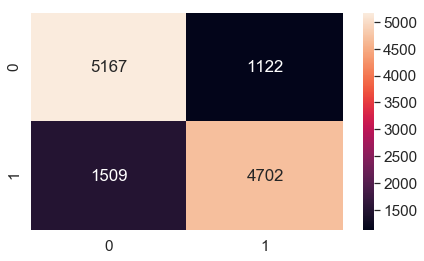

In [11]:
# confussion matrix
df_cm = pd.DataFrame(cm_final, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (7, 4))
sns.set(font_scale = 1.4)
sns.heatmap(df_cm, annot = True, fmt = 'g')

#### The model is giving type II error higher than type I.
Type I error is equivalent to a False positive. Type II error is equivalent to a False negative. Type I error refers to non-acceptance of hypothesis which ought to be accepted. Type II error is the acceptance of hypothesis which ought to be rejected.

Type I error: Predicting that a model is not correct when it is correct.
Type II error: Predicting that the model is correct when it is not.

In this case, Type II error is a huge risk. It could lead to a loss for company,As comapny will invest on users but they will not subscribe to any products. Type I error is less serious as company will not invest on users but they will subscribe products.

#### To find the ML model is overfitted, under fitted or generalize doing cross-validation.

In [12]:
# Cross validation of the model
from sklearn.model_selection import cross_val_score
cross_validation = cross_val_score(estimator = xgb_model, X = X_train2, y = y_train, cv = 10)
print("Cross validation of XGBoost model = ",cross_validation)
print("Cross validation of XGBoost model (in mean) = ",cross_validation.mean())


Cross validation of XGBoost model =  [0.7728     0.7904     0.78       0.77786667 0.7872     0.7864
 0.7864     0.7792     0.78586667 0.77813333]
Cross validation of XGBoost model (in mean) =  0.7824266666666666


The mean value cross-validation and XGBoost model accuracy is 78%. That means our XGBoost model is a generalized model.

#### Mapping predicted output to the target

In [13]:
final_results = pd.concat([y_test, test_identifier], axis = 1).dropna()
final_results["predicted_results"] = y_pred
final_results[['user','enrolled','predicted_results']].reset_index(drop = True)

,user,enrolled,predicted_results
0,239786,1,1
1,279644,1,1
2,98290,0,0
3,170150,1,1
4,237568,1,0
...,...,...,...
12495,105993,0,1
12496,288268,1,1
12497,12780,1,1
12498,299091,1,1


### Final Conclusion
Our model will label every new user as 'highly likely' or 'unlikely' to subscribe. We can further validate our results by running our predictions on daily new installs, and see whether our accuracy is consistent. From there, we can narrow our marketing efforts to only those users 'unlikely' to subscribe, and thus increase our subscription rate.